# Dividir el dataset en conjunto de entrenamiento y de testing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("D:\\Machine Learning\\python-ml-course-master\\datasets\\ads\\Advertising.csv")

In [10]:
a = np.random.randn(len(data))

(array([ 1.,  4.,  8., 22., 46., 45., 35., 26.,  9.,  4.]),
 array([-3.24621974, -2.66275404, -2.07928834, -1.49582264, -0.91235694,
        -0.32889124,  0.25457446,  0.83804016,  1.42150585,  2.00497155,
         2.58843725]),
 <a list of 10 Patch objects>)

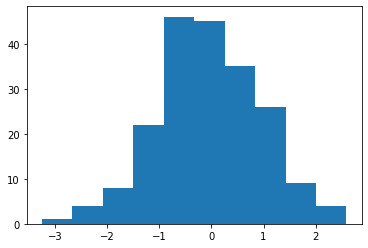

In [11]:
plt.hist(a)

In [13]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [15]:
len(training), len(testing)

(159, 41)

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data = training).fit() #Ventas en función de TV y Radio

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     677.5
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.21e-77
Time:                        18:55:32   Log-Likelihood:                -310.15
No. Observations:                 159   AIC:                             626.3
Df Residuals:                     156   BIC:                             635.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6340      0.347      7.589      0.000       1.948       3.319
TV             0.0471      0.002     29.571      0.000       0.044       0.050
Radio          0.1903      0.009     20.902      0.000       0.172       0.208
==============================================================================
Omnibus:                       50.275   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.749
Skew:                          -1.322   Prob(JB):                     8.15e-28
Kurtosis:                       6.440   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.6340 + 0.0471*TV + 0.1903*Radio

## Validación del modelo con el conjunto de testing

In [28]:
sales_pred = lm.predict(testing)
sales_pred

8       3.438458
10      6.849626
16     12.790741
20     18.187306
25     15.677214
28     19.504349
29      9.002491
43     13.973201
53     20.022309
54     20.482256
58     21.996956
59     18.167323
60      5.533303
62     16.849673
70     17.830524
79      9.560458
80     11.311707
82     10.042033
86     11.459235
88     11.643600
90      9.889190
94     10.354431
111    21.244297
116    11.908651
118    15.573738
119     6.592015
123    15.013653
129     7.723436
131    15.671320
135    13.851754
136    11.260689
144     9.979375
151     9.929063
152    16.370753
155     5.034400
166    10.631763
169    18.035811
177    12.131202
192     4.223932
194    16.456265
195     5.136486
dtype: float64

In [29]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

99.60212148711588

In [30]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.6189837739110482

In [32]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.12545517809554524